In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

Matplotlib is building the font cache; this may take a moment.


In [9]:
data_train=pd.read_csv("fraudTest.csv")
data_test=pd.read_csv("fraudTrain.csv")

In [10]:
full_data=pd.concat([data_train, data_test])


In [11]:
full_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [12]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               

In [13]:
full_data=full_data.dropna()
full_data.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

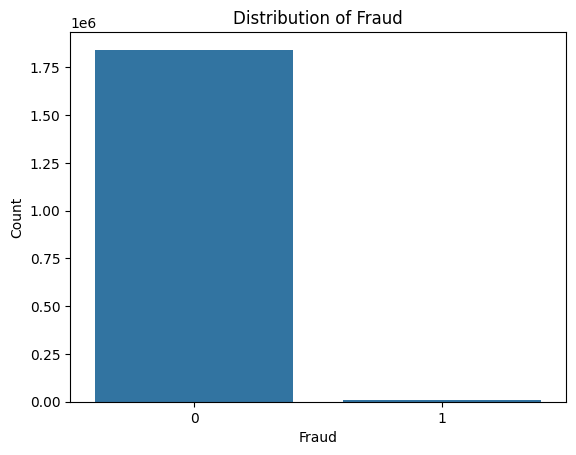

In [14]:
fraud_counts=full_data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [15]:
full_data.duplicated().sum()


np.int64(0)

In [17]:
fraud=full_data[full_data["is_fraud"]==1]
not_fraud=full_data[full_data["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])

9651
1842743


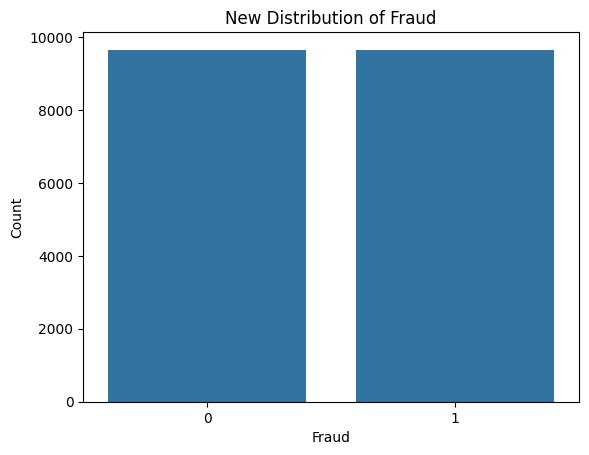

In [18]:
not_fraud=not_fraud.sample(fraud.shape[0])
data=pd.concat([fraud,not_fraud])
fraud_counts=data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values)
plt.title('New Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [19]:
unused_cols=['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant']
data.drop(columns=unused_cols,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 1685 to 76060
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  19302 non-null  object 
 1   cc_num                 19302 non-null  int64  
 2   category               19302 non-null  object 
 3   amt                    19302 non-null  float64
 4   zip                    19302 non-null  int64  
 5   lat                    19302 non-null  float64
 6   long                   19302 non-null  float64
 7   city_pop               19302 non-null  int64  
 8   merch_lat              19302 non-null  float64
 9   merch_long             19302 non-null  float64
 10  is_fraud               19302 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.8+ MB


In [23]:
#encode variables
encoder=LabelEncoder()
data['category']=encoder.fit_transform(data['category'])
data['cc_num']=encoder.fit_transform(data['cc_num'])
data.head()

,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
1685,572,5,24.84,79759,31.8599,-102.7413,23,32.575873,-102.604290,1,21,6,2020,22,6
1767,894,8,780.52,53803,42.5545,-90.3508,1306,42.461127,-91.147148,1,21,6,2020,22,32
1781,894,0,620.33,53803,42.5545,-90.3508,1306,42.771834,-90.158365,1,21,6,2020,22,37
1784,649,11,1077.69,70726,30.4590,-90.9027,71335,31.204974,-90.261595,1,21,6,2020,22,38
1857,572,12,842.65,79759,31.8599,-102.7413,23,31.315782,-102.736390,1,21,6,2020,23,2


In [24]:
scaler=StandardScaler()
data['amt']=scaler.fit_transform(data[['amt']])
data['zip']=scaler.fit_transform(data[['zip']])
data['city_pop']=scaler.fit_transform(data[['city_pop']])
data['cc_num']=encoder.fit_transform(data['cc_num'])
X=data.drop('is_fraud',axis=1)
y=data['is_fraud']

In [25]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


In [26]:
#building model

RFC=RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

In [27]:
#evaluate the model
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.9647759647759647
Precision: 0.9648662821185108
Recall: 0.963855421686747
F1 score: 0.9643605870020965
Confusion matrix: [[1885   67]
 [  69 1840]]


Text(0.5, 1.0, 'Confusion Matrix')

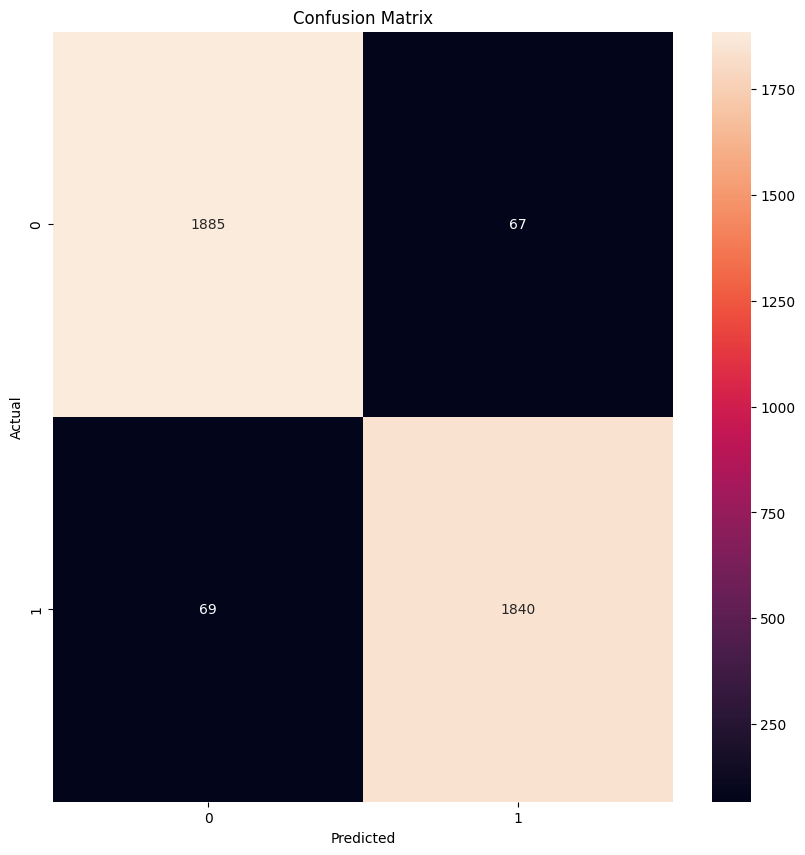

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')